In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')

In [3]:
data.head()

CountCases  BedDys  BeddystoCC  Severity  DiedCases  DiedBdDys  Hsptlsns  \
0          17     133    7.823529        75          4          9        13   
1          13     372   28.615385        63          4         34         9   
2           8     106   13.250000        48          4         13         4   
3          45     218    4.844444       153          3         24        42   
4          24     238    9.916667        90          3          8        21   

   April  August  December  ...  Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  \
0      0       0         0  ...      1      0      0      0      0      0   
1      0       0         0  ...      0      0      0      0      0      0   
2      0       0         0  ...      0      0      0      0      0      1   
3      0       0         0  ...      0      0      0      1      0      0   
4      0       1         0  ...      1      0      0      0      0      0   

   Y2019  Y2020  Y2021  CovidPrd  
0      0      0      0         0  
1      0      0      0         0  
2      0      0      0         0  
3      0      0      0         0  
4      0      0      0         0  

[5 rows x 58 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54038 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       54038 non-null  int64  
 1   BedDys           54038 non-null  int64  
 2   BeddystoCC       54038 non-null  float64
 3   Severity         54038 non-null  int64  
 4   DiedCases        54038 non-null  int64  
 5   DiedBdDys        54038 non-null  int64  
 6   Hsptlsns         54038 non-null  int64  
 7   April            54038 non-null  int64  
 8   August           54038 non-null  int64  
 9   December         54038 non-null  int64  
 10  February         54038 non-null  int64  
 11  January          54038 non-null  int64  
 12  July             54038 non-null  int64  
 13  June             54038 non-null  int64  
 14  March            54038 non-null  int64  
 15  May              54038 non-null  int64  
 16  November         54038 non-null  int64  
 17  October     

In [5]:
a = data['BeddystoCC'].unique()

In [6]:
a.sort()

In [7]:
a

array([  1.        ,   1.04347826,   1.05      , ..., 475.        ,
       562.        , 608.        ])

# Car Driver

In [8]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [9]:
b = filtered_data['BeddystoCC'].unique()
b.sort()
b

array([  1.        ,   1.04347826,   1.05555556, ..., 203.        ,
       255.        , 257.        ])

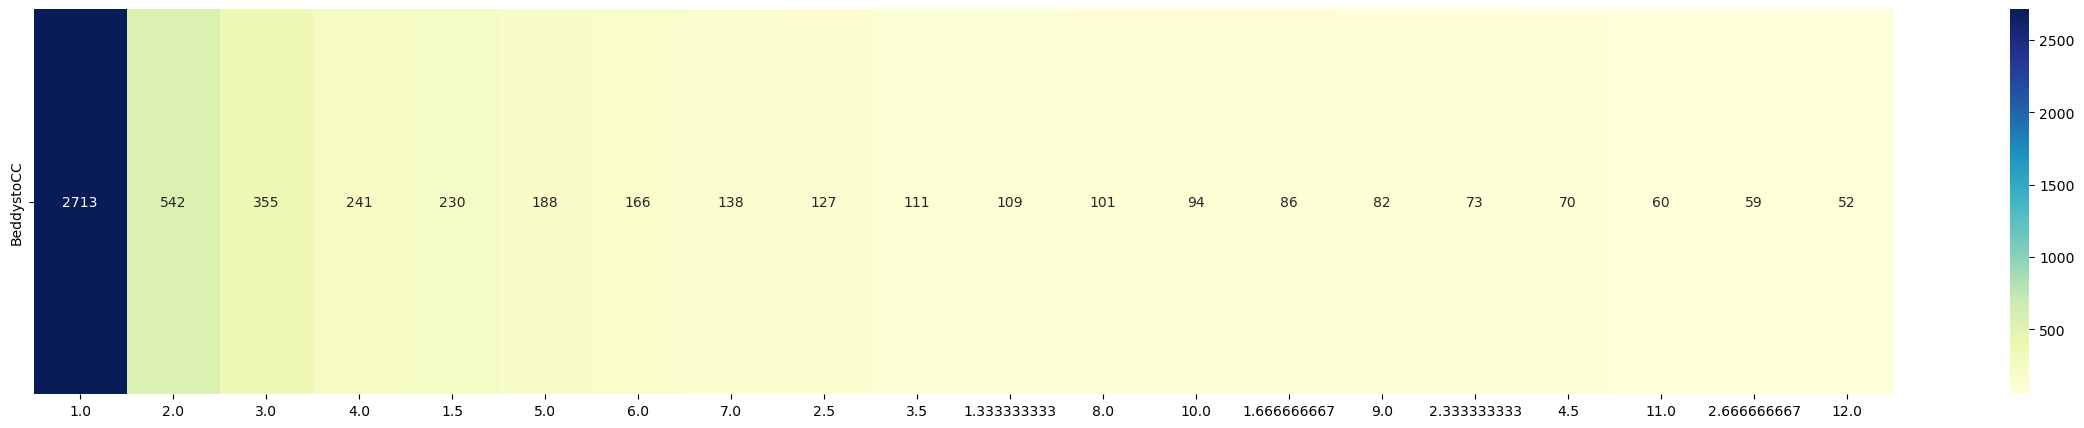

In [10]:


value_counts = filtered_data['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

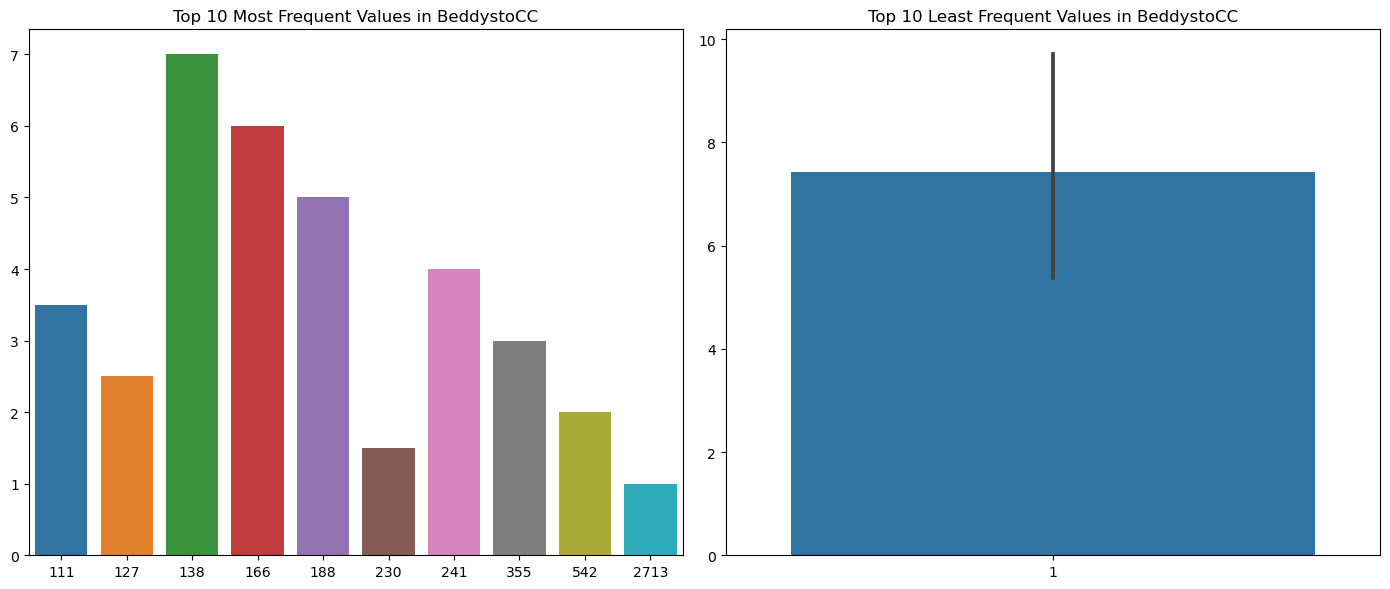

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


value_counts = filtered_data['BeddystoCC'].value_counts()

top_10 = value_counts.nlargest(10)

bottom_10 = value_counts.nsmallest(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.barplot(x=top_10.values, y=top_10.index)
plt.title('Top 10 Most Frequent Values in BeddystoCC')

plt.subplot(1, 2, 2) 
sns.barplot(x=bottom_10.values, y=bottom_10.index)
plt.title('Top 10 Least Frequent Values in BeddystoCC')

plt.tight_layout()
plt.show()

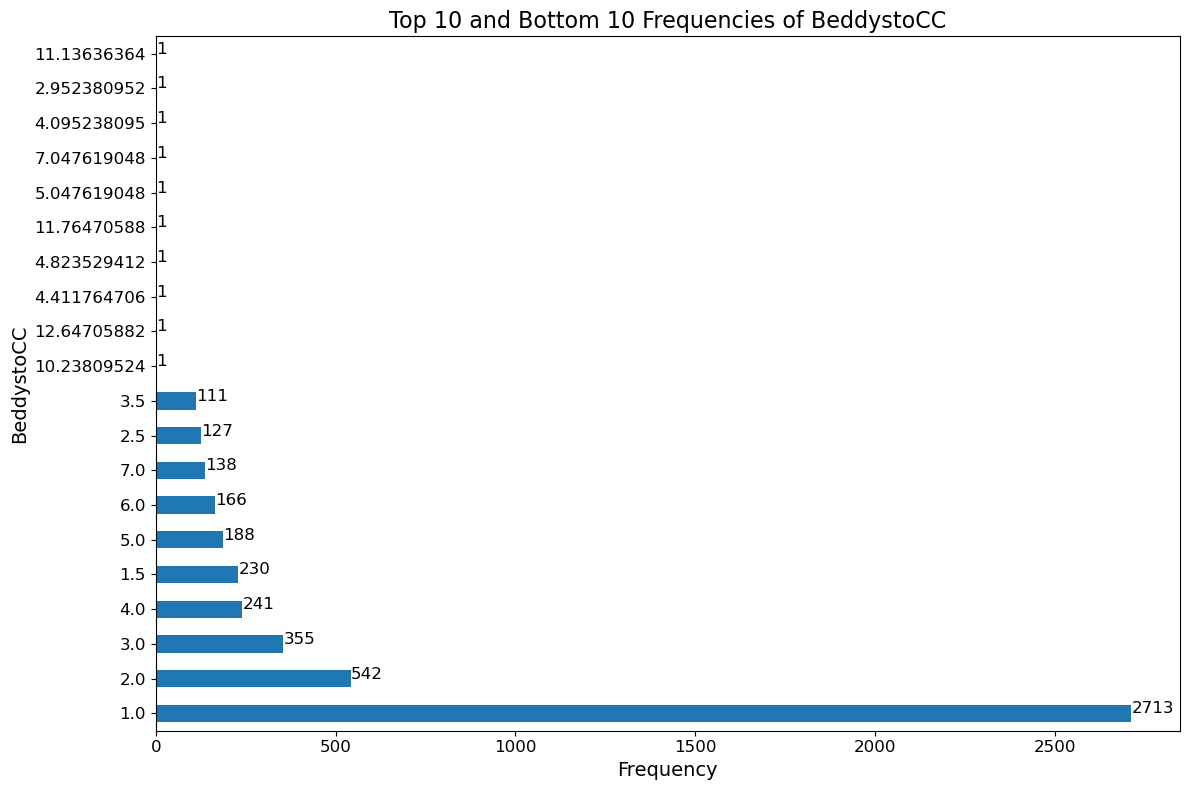

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [13]:
filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >= 7, 1, 0)
filtered_data['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1308/2810551237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >= 7, 1, 0)


0    9688
1    2894
Name: Bed_days_category, dtype: int64

In [14]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
X = filtered_data[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_xgb = rf_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.8160919540229885
0.6418079096045197
0.7185325743200506
[[2762  128]
 [ 317  568]]
0    9688
1    2894
Name: Bed_days_category, dtype: int64
0.8821192052980132


# Car passenger          

In [15]:
filtered_data2 = data[data['CarPngr'] == 1]
filtered_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11789 entries, 33 to 54030
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11789 non-null  int64  
 1   BedDys           11789 non-null  int64  
 2   BeddystoCC       11789 non-null  float64
 3   Severity         11789 non-null  int64  
 4   DiedCases        11789 non-null  int64  
 5   DiedBdDys        11789 non-null  int64  
 6   Hsptlsns         11789 non-null  int64  
 7   April            11789 non-null  int64  
 8   August           11789 non-null  int64  
 9   December         11789 non-null  int64  
 10  February         11789 non-null  int64  
 11  January          11789 non-null  int64  
 12  July             11789 non-null  int64  
 13  June             11789 non-null  int64  
 14  March            11789 non-null  int64  
 15  May              11789 non-null  int64  
 16  November         11789 non-null  int64  
 17  October    

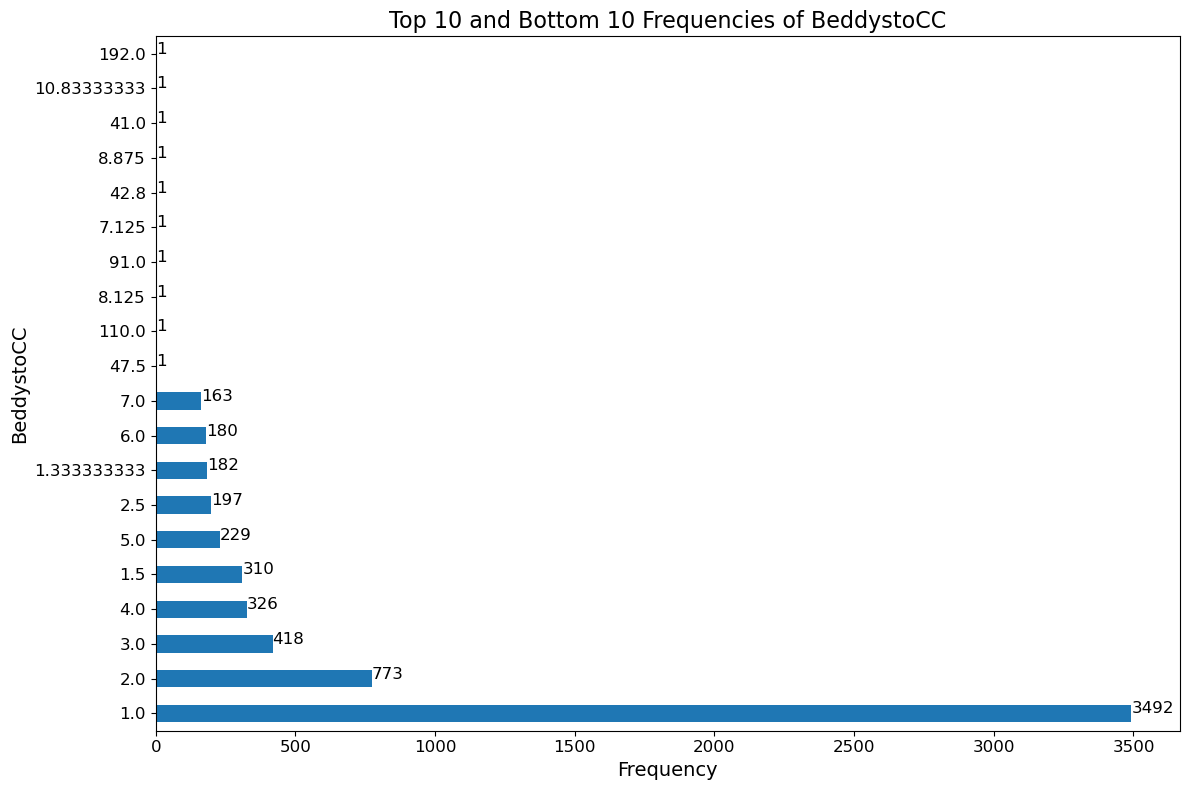

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data2['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 7, 1, 0)
filtered_data2['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1308/1124037408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 7, 1, 0)


0    9426
1    2363
Name: Bed_days_category, dtype: int64

In [18]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
X = filtered_data2[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data2['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_xgb = rf_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.8250883392226148
0.6441379310344828
0.7234701781564679
[[2713   99]
 [ 258  467]]
0    9426
1    2363
Name: Bed_days_category, dtype: int64
0.899067005937235


# Mtrcyclist

In [19]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

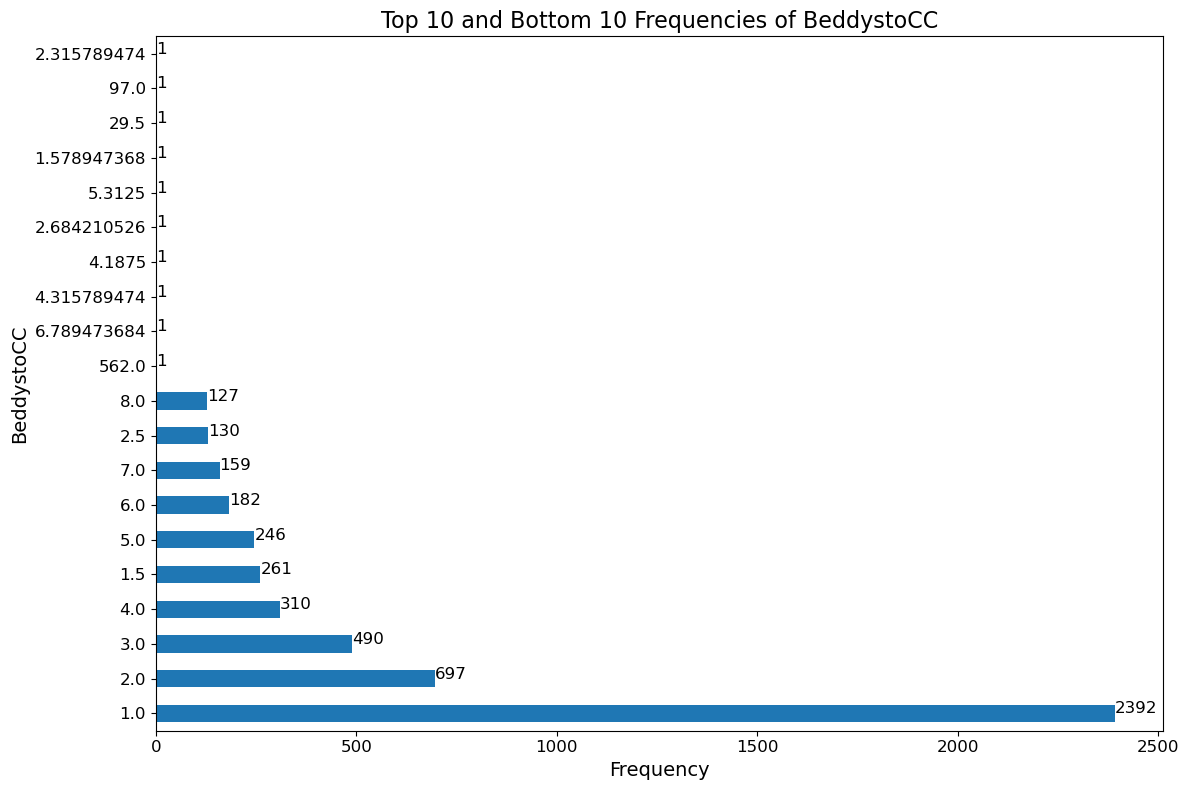

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data3['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 7, 1, 0)
filtered_data3['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1308/1619151574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 7, 1, 0)


0    8477
1    2750
Name: Bed_days_category, dtype: int64

In [22]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
X = filtered_data3[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data3['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_xgb = rf_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7690100430416069
0.6683291770573566
0.7151434289526349
[[2406  161]
 [ 266  536]]
0    8477
1    2750
Name: Bed_days_category, dtype: int64
0.8732561590976551


# Pedal cyclist

In [23]:
filtered_data4 = data[data['PdlCyclist'] == 1]
filtered_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12354 entries, 32 to 54035
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12354 non-null  int64  
 1   BedDys           12354 non-null  int64  
 2   BeddystoCC       12354 non-null  float64
 3   Severity         12354 non-null  int64  
 4   DiedCases        12354 non-null  int64  
 5   DiedBdDys        12354 non-null  int64  
 6   Hsptlsns         12354 non-null  int64  
 7   April            12354 non-null  int64  
 8   August           12354 non-null  int64  
 9   December         12354 non-null  int64  
 10  February         12354 non-null  int64  
 11  January          12354 non-null  int64  
 12  July             12354 non-null  int64  
 13  June             12354 non-null  int64  
 14  March            12354 non-null  int64  
 15  May              12354 non-null  int64  
 16  November         12354 non-null  int64  
 17  October    

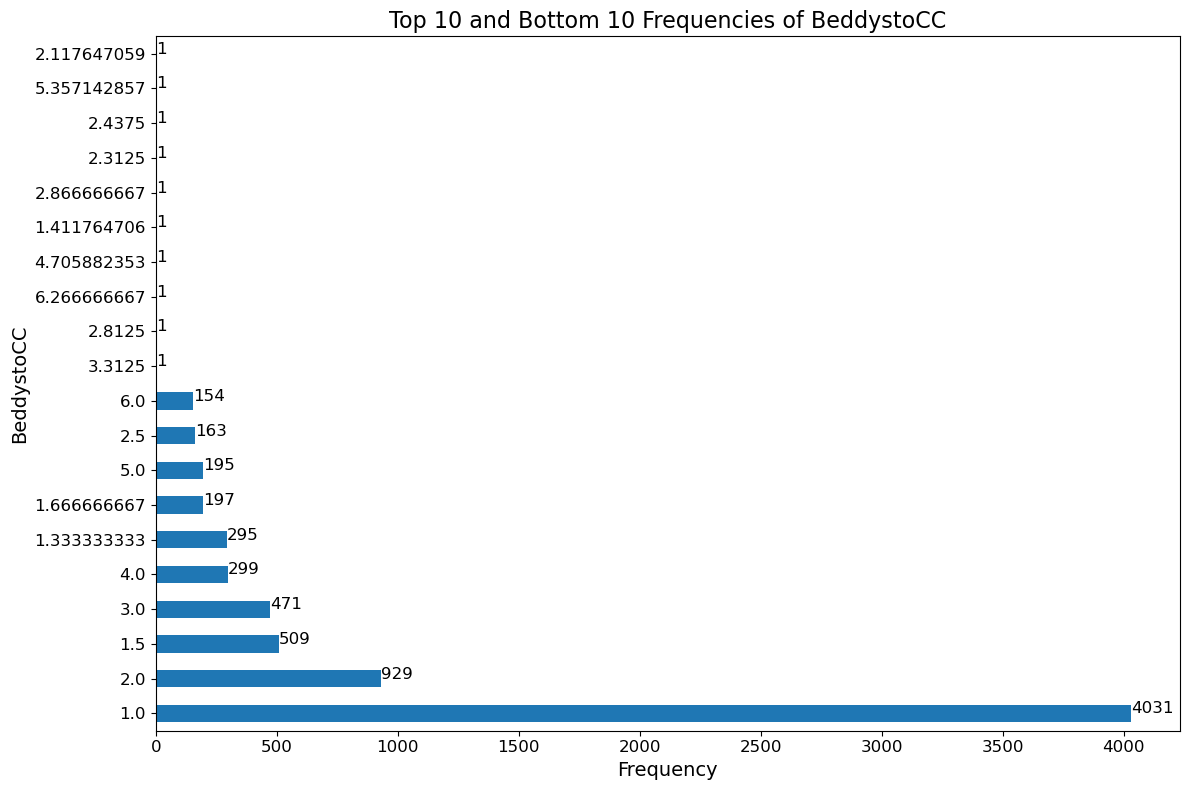

In [24]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data4['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

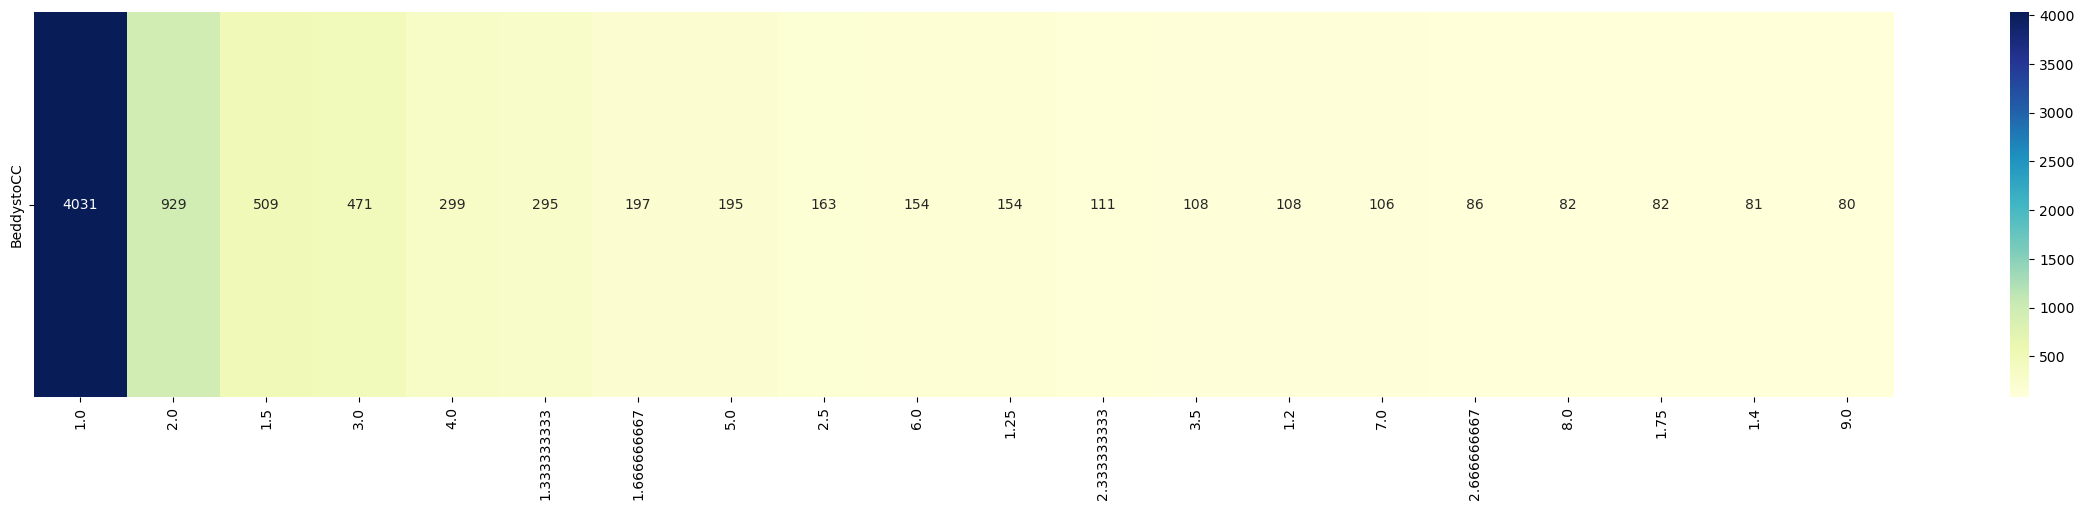

In [25]:


value_counts = filtered_data4['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

In [26]:
filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 7, 1, 0)
filtered_data4['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1308/103000103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 7, 1, 0)


0    11143
1     1211
Name: Bed_days_category, dtype: int64

In [27]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
X = filtered_data4[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data4['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_xgb = rf_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7872340425531915
0.4707379134860051
0.589171974522293
[[3264   50]
 [ 208  185]]
0    11143
1     1211
Name: Bed_days_category, dtype: int64
0.9304019422713785


# Pedestrian

In [28]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October      

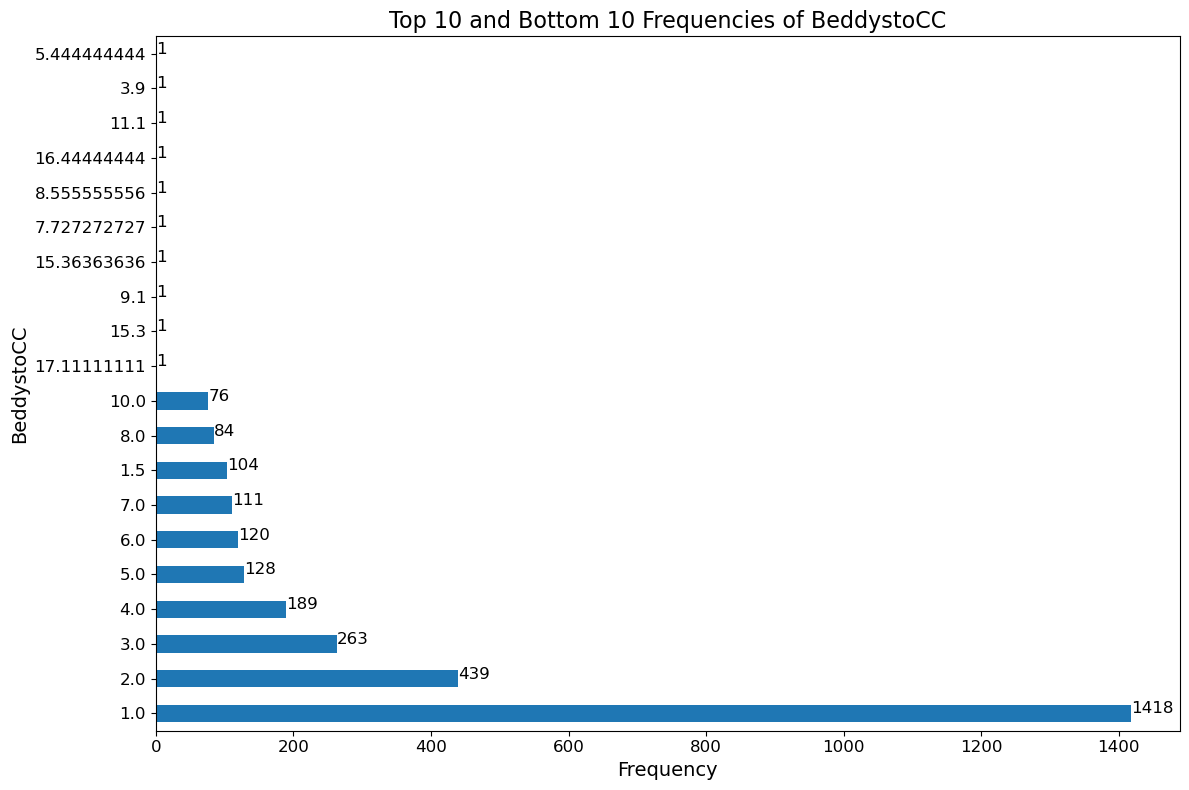

In [29]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

frequencies = filtered_data5['BeddystoCC'].value_counts()

top_10 = frequencies.nlargest(10)

bottom_10 = frequencies.nsmallest(10)

combined_data = pd.concat([top_10, bottom_10]).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
combined_data.plot(kind='barh', fontsize=12)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('BeddystoCC', fontsize=14)
plt.title('Top 10 and Bottom 10 Frequencies of BeddystoCC', fontsize=16)

for i, v in enumerate(combined_data):
    plt.text(v + 0.1, i, str(v), fontsize=12)

plt.tight_layout()
plt.show()

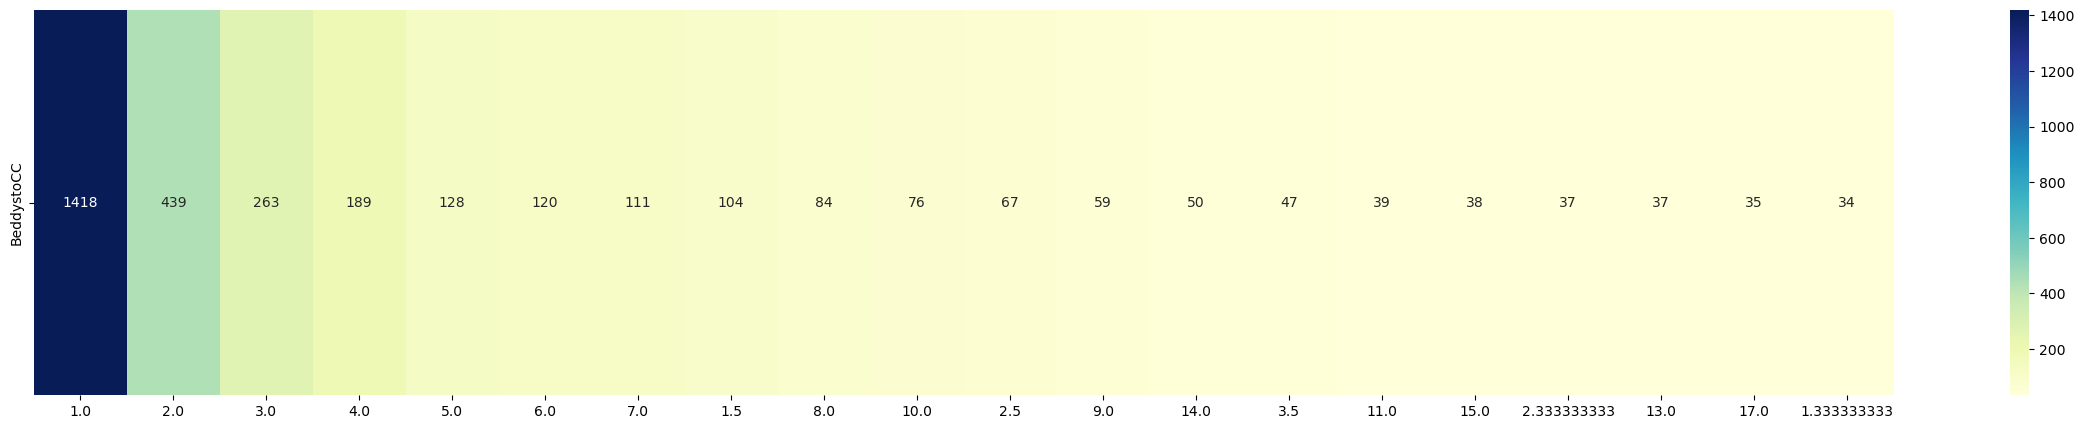

In [30]:

value_counts = filtered_data5['BeddystoCC'].value_counts()

N = 20
top_values = value_counts.nlargest(N)

heatmap_data = pd.DataFrame(top_values).T

plt.figure(figsize=(30, 5)) 

sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")

plt.show()

In [31]:
filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 7, 1, 0)
filtered_data5['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1308/2450149329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 7, 1, 0)


0    3957
1    2129
Name: Bed_days_category, dtype: int64

In [32]:
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score




X = filtered_data5[['Age07','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
                   'CarPngr','Mtrcyclist','PdlCyclist','Pedestrian',
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'BedDys',
                   'CovidPrd' ]]



y = filtered_data5['Bed_days_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_xgb = rf_model.predict(X_test)


accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.8548895899053628
0.8416149068322981
0.8482003129890454
[[1090   92]
 [ 102  542]]
0    3957
1    2129
Name: Bed_days_category, dtype: int64
0.8937568455640745


# regression

# REGRESION Car Driver

In [4]:
import xgboost as xgb
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()


X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   
                   'CovidPrd']]

y = filtered_data['BeddystoCC']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

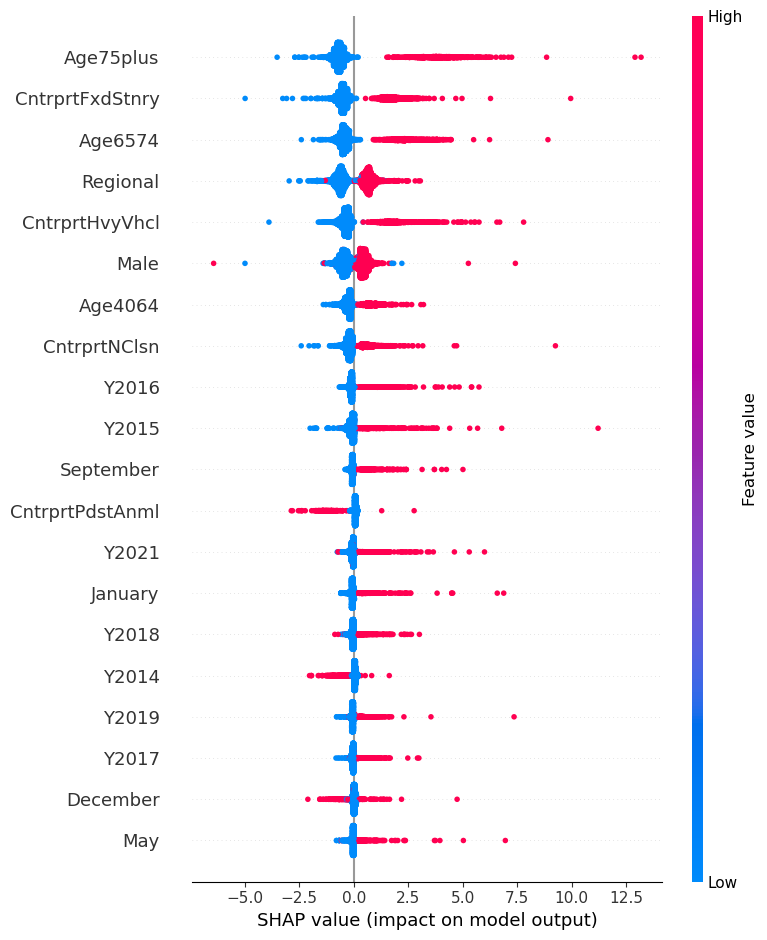

In [5]:
import shap


xgb_model.fit(x_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, feature_names=X.columns)

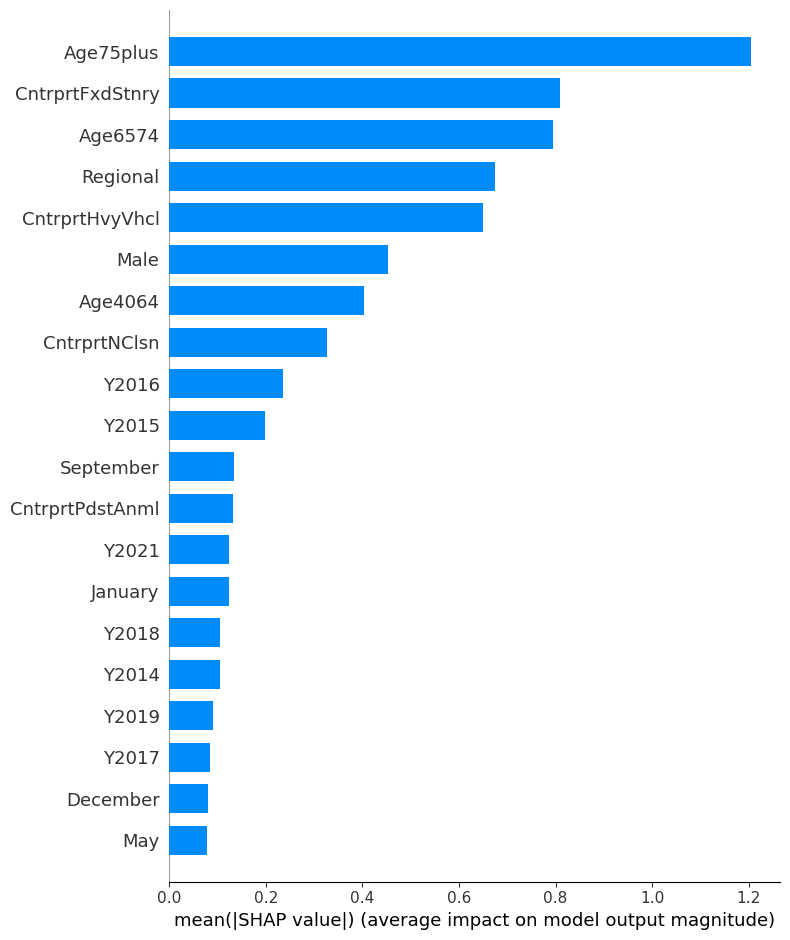

In [6]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

                         Feature  Mean SHAP Value
Age75plus              Age75plus         1.204455
CntrprtFxdStnry  CntrprtFxdStnry         0.809005
Age6574                  Age6574         0.794644
Regional                Regional         0.675321
CntrprtHvyVhcl    CntrprtHvyVhcl         0.650412
Male                        Male         0.451824


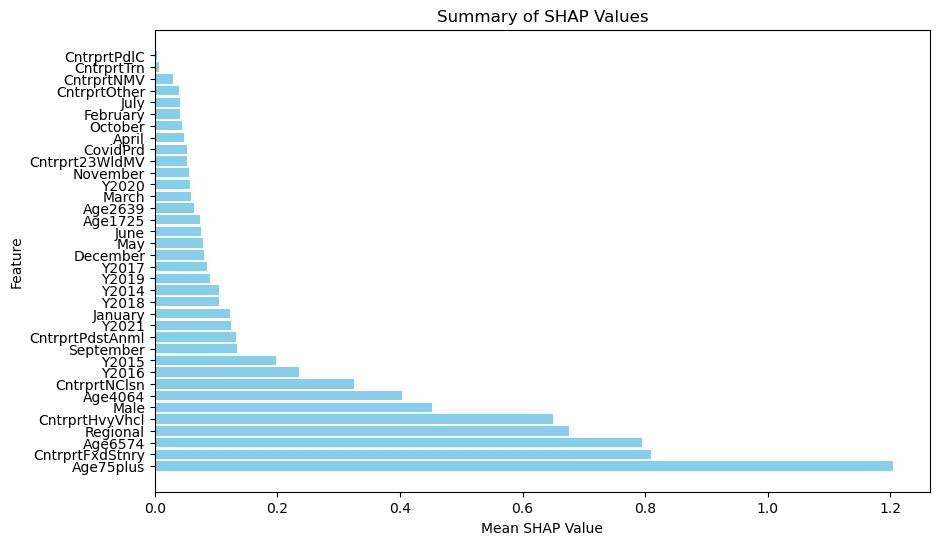

In [9]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:6])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [10]:
import plotly.graph_objects as go

source = [0, 0, 0, 0, 0, 0]
target = [1, 2, 3, 4, 5, 6]
value = [1.204455, 0.809005, 0.794644, 0.675321, 0.650412, 0.451824]
color = ["blue", "green", "red", "orange", "purple", "cyan"]
labels = ["Source", "Age75plus", "CntrprtFxdStnry", "Age6574", "Regional", "CntrprtHvyVhcl", "Male"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()

In [11]:
pred = xgb_model.predict(x_test)
pred.shape

(3775,)

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 10.10
MAE: 4.30
R^2: 0.03


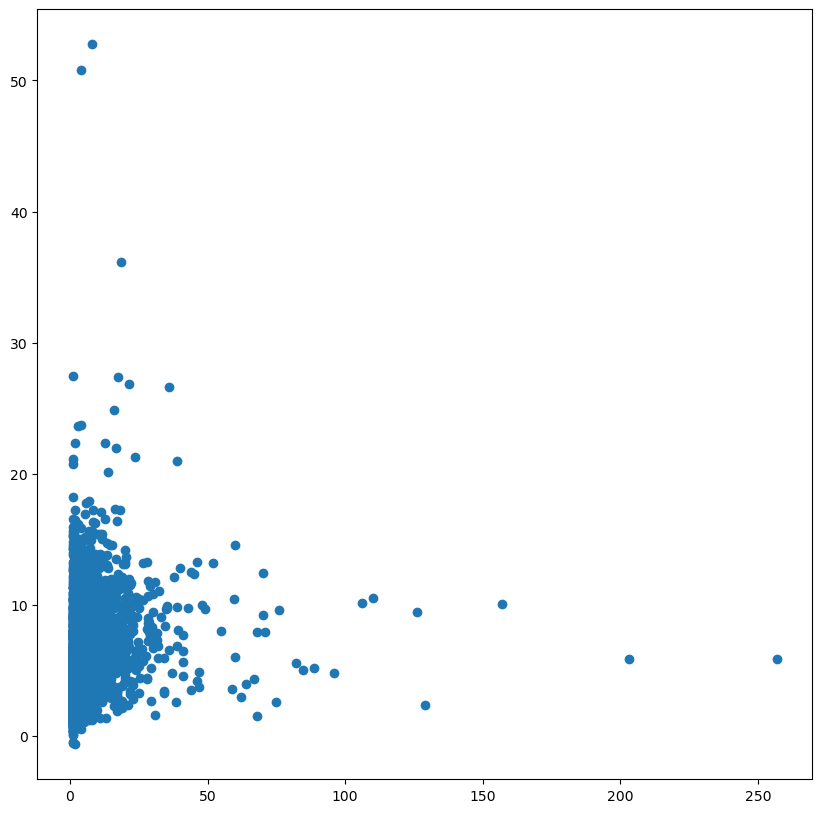

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred)


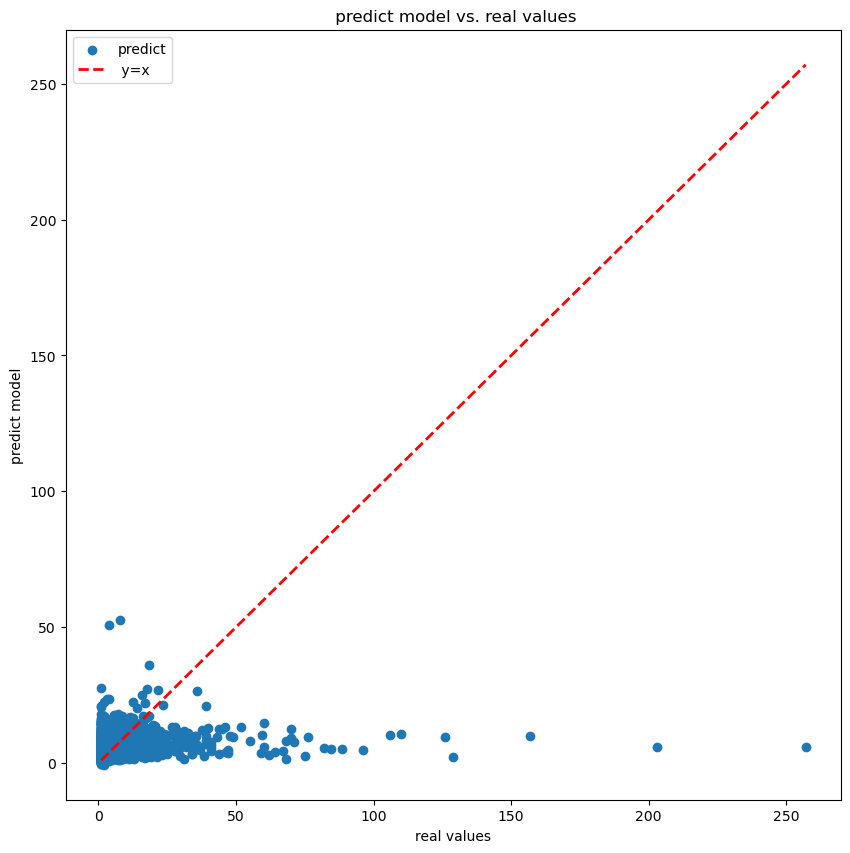

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred, label='predict')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label=' y=x')

ax.legend()

ax.set_title(' predict model vs. real values')
ax.set_xlabel('real values')
ax.set_ylabel('predict model')

plt.show()


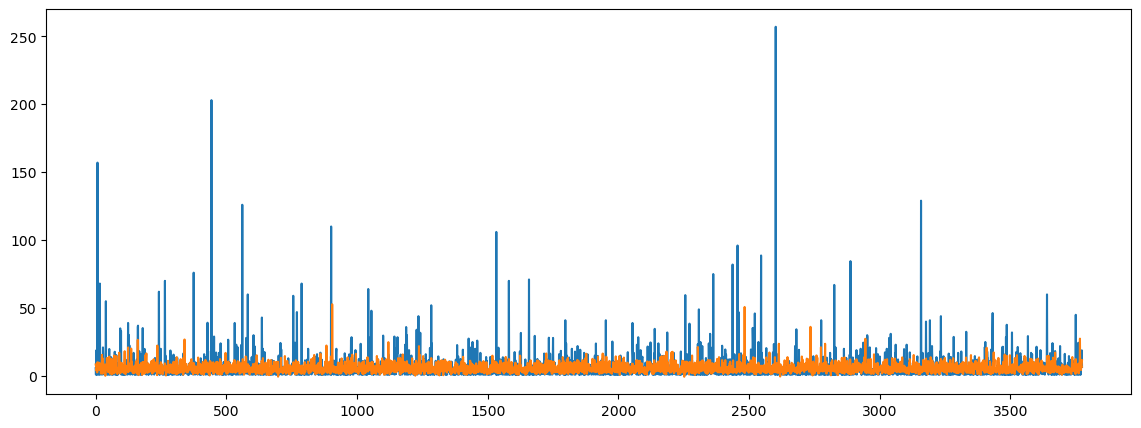

In [15]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)


## delete out liers

In [16]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

ridge_regressor = Ridge(alpha=1.0)  # مقدار پیش‌فرض برای پارامتر جمله جریمه (alpha) را می‌توانید تغییر دهید

# آموزش مدل
ridge_regressor.fit(x_train, y_train)

# پیش‌بینی برای داده‌های آزمون
pred = ridge_regressor.predict(x_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 4.90
MAE: 3.14
R^2: 0.16


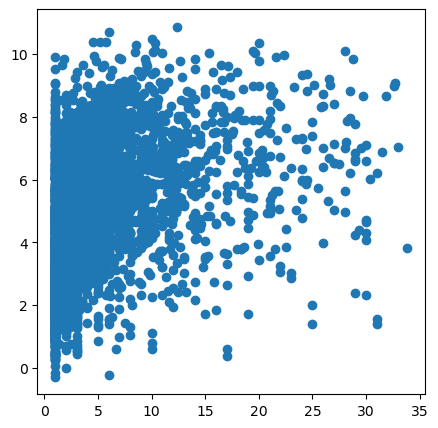

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)


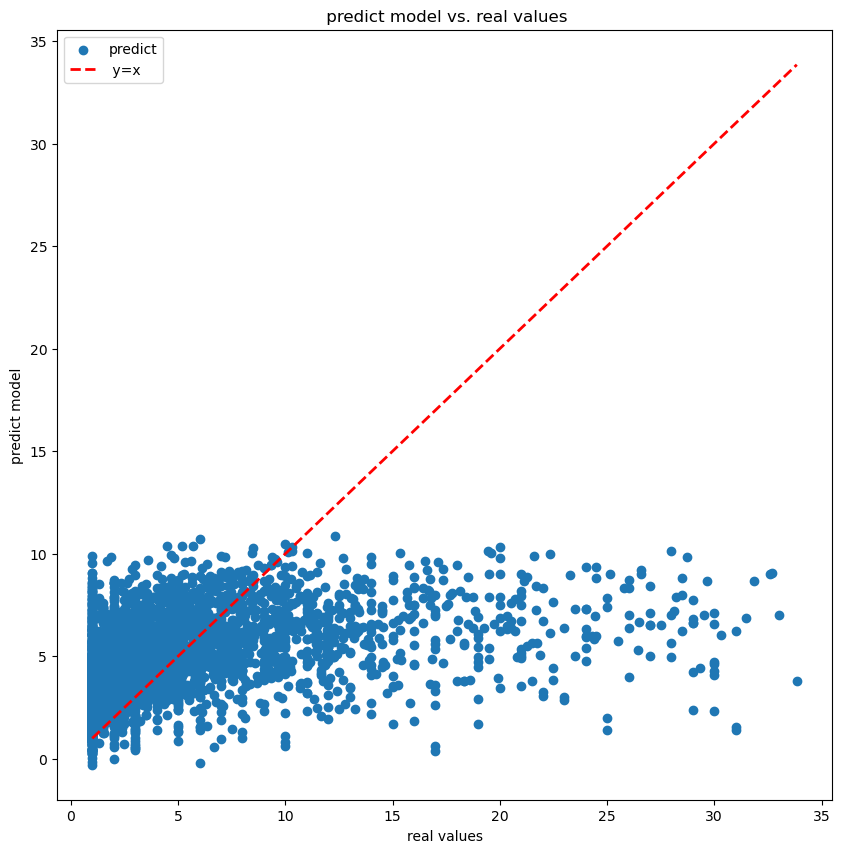

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.scatter(y_test, pred, label='predict')

ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label=' y=x')

ax.legend()

ax.set_title(' predict model vs. real values')
ax.set_xlabel('real values')
ax.set_ylabel('predict model')

plt.show()

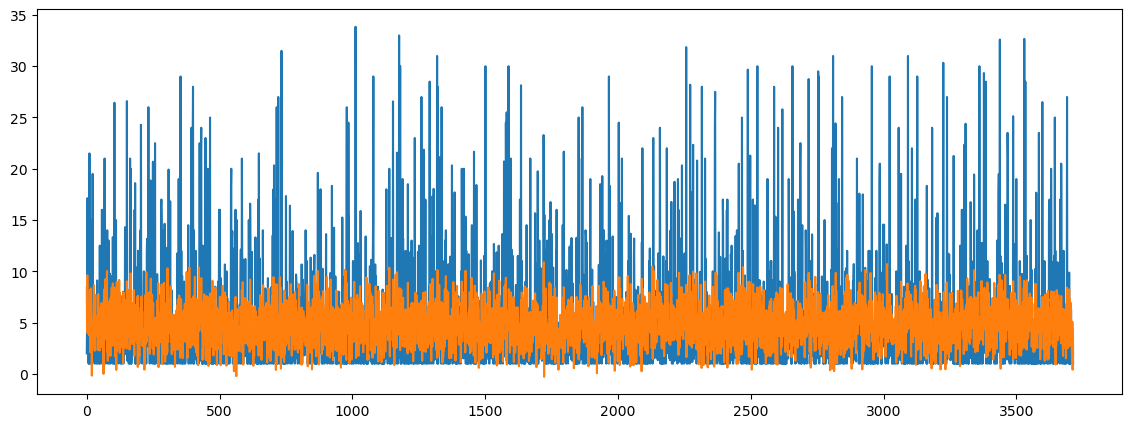

In [19]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)


In [20]:
filtered_data2 = data[data['CarPngr'] == 1]


In [21]:
filtered_data2 = data[data['CarPngr'] == 1]


# REGRASION Car passenger

In [22]:
import xgboost as xgb
filtered_data2 = data[data['CarPngr'] == 1]
filtered_data2.info()

X = filtered_data2[['Age07','Age816','Age1725','Age2639','Age4064','Age6574',
                    'Female',
                    'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   
                   'CovidPrd']] 

y = filtered_data2['BeddystoCC']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11789 entries, 33 to 54030
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11789 non-null  int64  
 1   BedDys           11789 non-null  int64  
 2   BeddystoCC       11789 non-null  float64
 3   Severity         11789 non-null  int64  
 4   DiedCases        11789 non-null  int64  
 5   DiedBdDys        11789 non-null  int64  
 6   Hsptlsns         11789 non-null  int64  
 7   April            11789 non-null  int64  
 8   August           11789 non-null  int64  
 9   December         11789 non-null  int64  
 10  February         11789 non-null  int64  
 11  January          11789 non-null  int64  
 12  July             11789 non-null  int64  
 13  June             11789 non-null  int64  
 14  March            11789 non-null  int64  
 15  May              11789 non-null  int64  
 16  November         11789 non-null  int64  
 17  October    

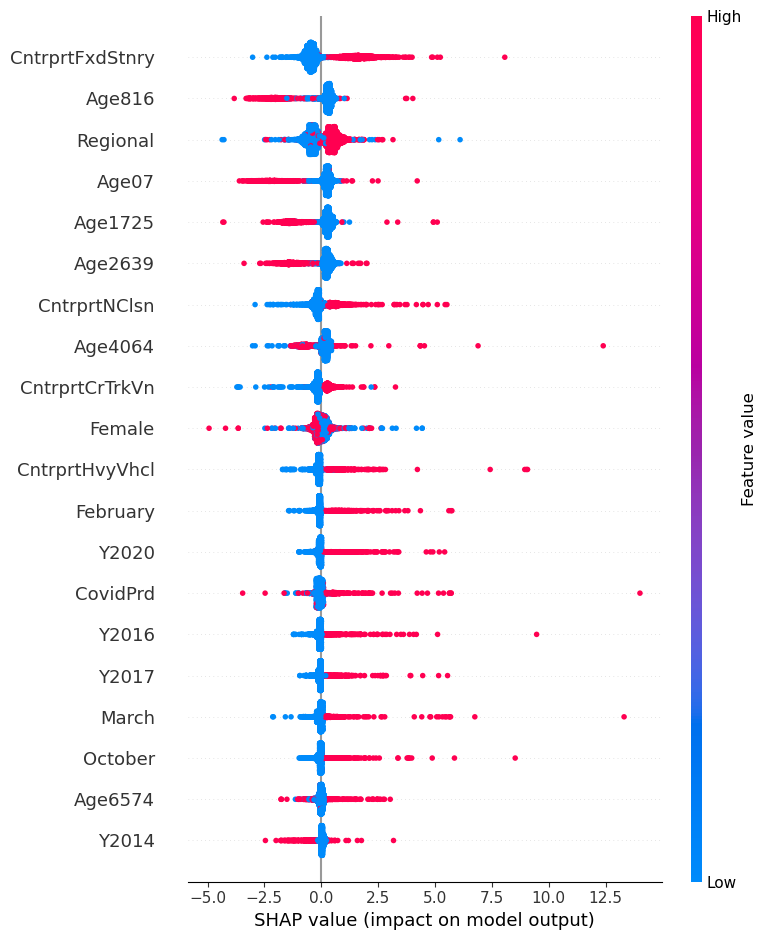

In [23]:
import shap


xgb_model.fit(x_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# نمایش SHAP values
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

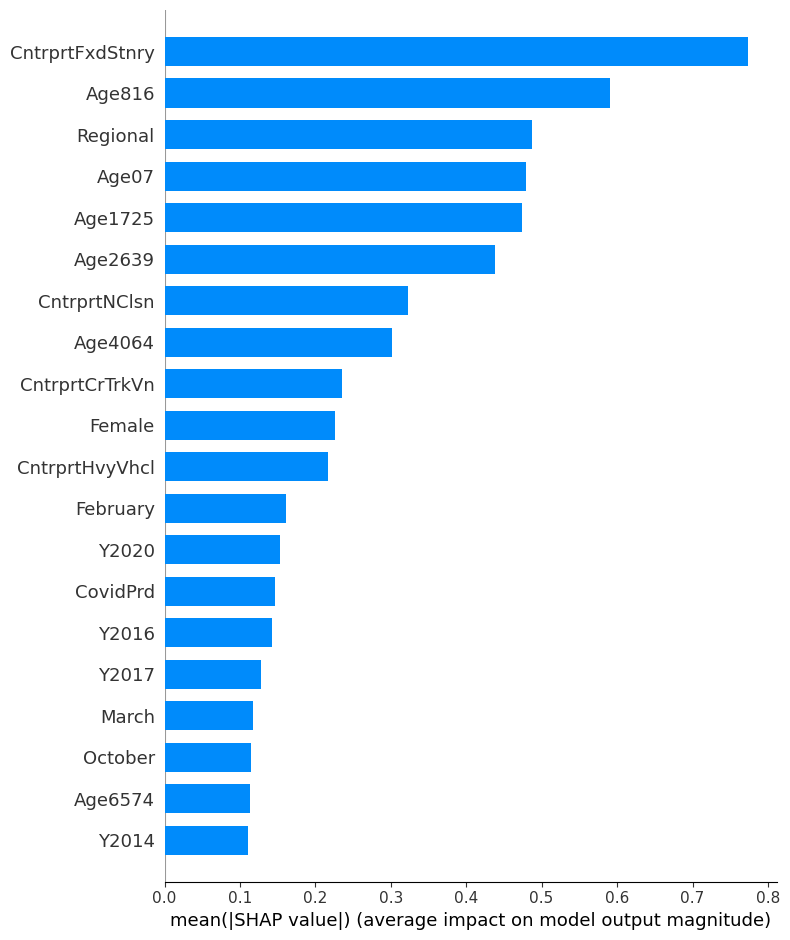

In [24]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

                         Feature  Mean SHAP Value
CntrprtFxdStnry  CntrprtFxdStnry         0.773088
Age816                    Age816         0.590495
Regional                Regional         0.486749
Age07                      Age07         0.479177
Age1725                  Age1725         0.473376
Age2639                  Age2639         0.438352


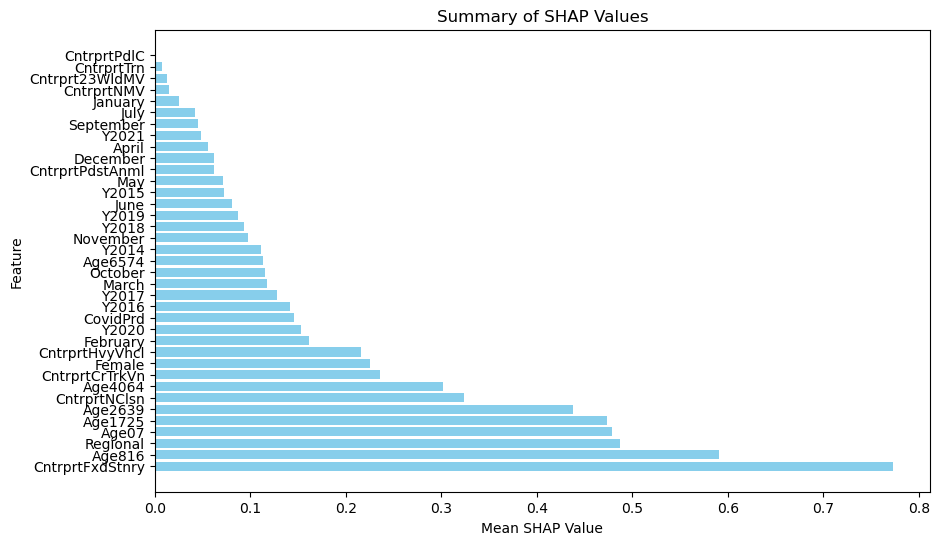

In [25]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:6])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [27]:
import plotly.graph_objects as go

source = [0, 1, 2, 3, 4, 5, 6]
target = [1, 2, 3, 4, 5, 6, 7] 
value = [0.773088, 0.590495, 0.486749, 0.479177, 0.473376, 0.438352]
color = ["blue", "green", "red", "orange", "purple", "cyan", "pink"]
labels = ["Source", "CntrprtFxdStnry", "Age816", "Regional", "Age07", "Age1725", "Age2639"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()

In [28]:
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")


RMSE: 10.25
MAE: 4.76
R^2: -0.02


## delete out liers

In [29]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

ridge_regressor = Ridge(alpha=1.0)  # مقدار پیش‌فرض برای پارامتر جمله جریمه (alpha) را می‌توانید تغییر دهید

# آموزش مدل
ridge_regressor.fit(x_train, y_train)

# پیش‌بینی برای داده‌های آزمون
pred = ridge_regressor.predict(x_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 4.97
MAE: 3.27
R^2: 0.08


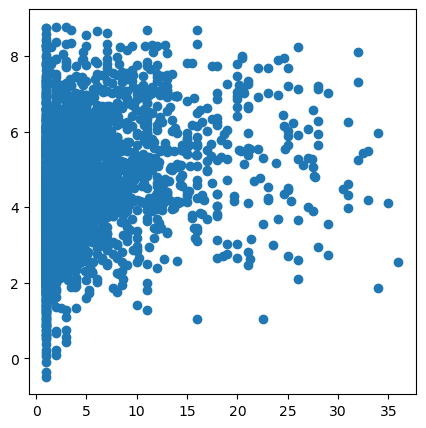

In [30]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)

In [31]:
pred.shape

(3481,)

In [32]:
filtered_data3 = data[data['Mtrcyclist'] == 1]

# Mtrcyclist REGRESION

In [33]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()
import xgboost as xgb


X = filtered_data3[['Age1725','Age2639','Age4064',
                    
                    'Male',
                    
                    'Regional',
               
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                   
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtCrTrkVn','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                   
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021']]

y = filtered_data3['BeddystoCC']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

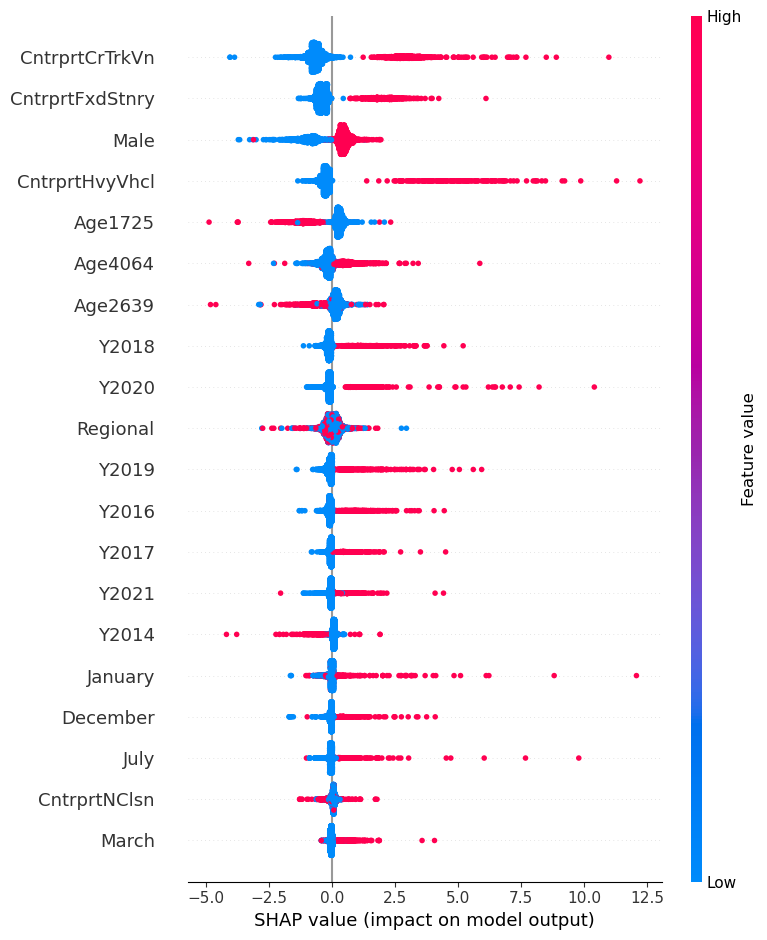

In [34]:
import shap


xgb_model.fit(x_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# نمایش SHAP values
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

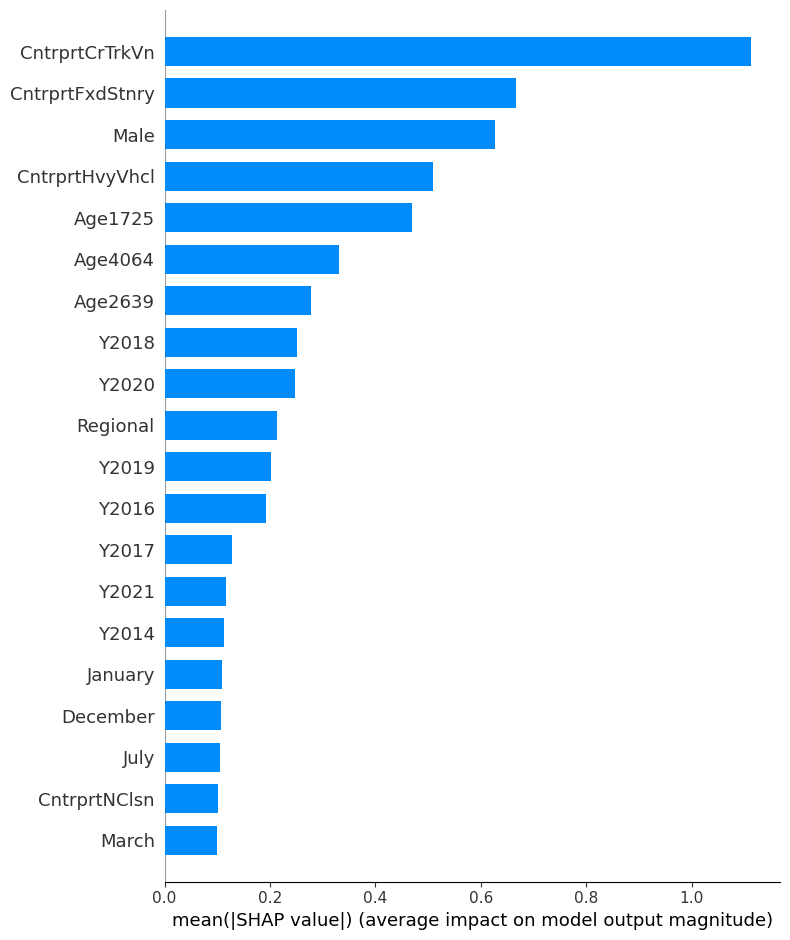

In [35]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         1.112099
CntrprtFxdStnry  CntrprtFxdStnry         0.666456
Male                        Male         0.626472
CntrprtHvyVhcl    CntrprtHvyVhcl         0.508887
Age1725                  Age1725         0.468906
Age4064                  Age4064         0.331329


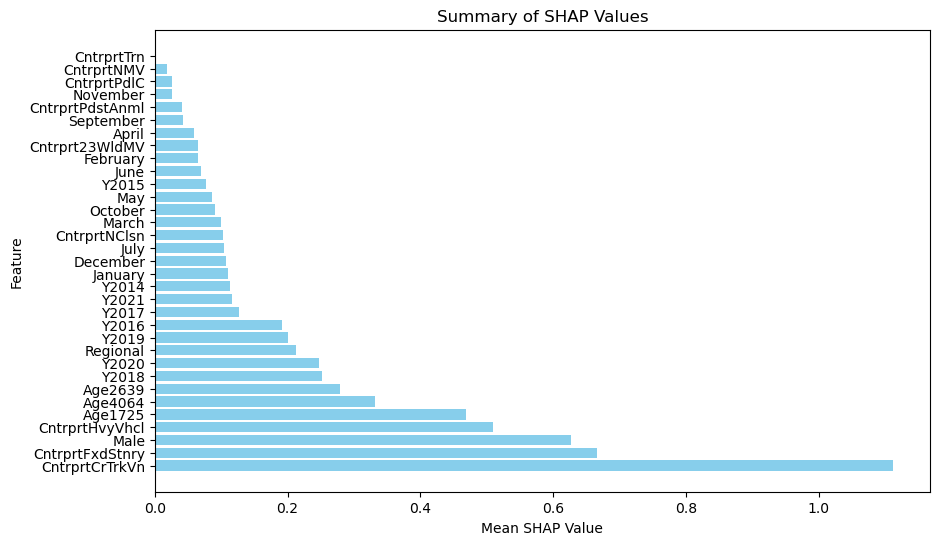

In [36]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:6])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [37]:
import plotly.graph_objects as go

source = [0, 1, 2, 3, 4, 5, 6, 7]
target = [1, 2, 3, 4, 5, 6, 7, 8]
value = [1.112099, 0.666456, 0.626472, 0.508887, 0.468906, 0.331329]
color = ["blue", "green", "red", "orange", "purple", "cyan", "pink", "brown"]
labels = ["Source", "CntrprtCrTrkVn", "CntrprtFxdStnry", "Male", "CntrprtHvyVhcl", "Age1725", "Age4064"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()

In [38]:
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 16.43
MAE: 5.21
R^2: 0.03


## delete out liers

In [39]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

ridge_regressor = Ridge(alpha=1.0)  # مقدار پیش‌فرض برای پارامتر جمله جریمه (alpha) را می‌توانید تغییر دهید

# آموزش مدل
ridge_regressor.fit(x_train, y_train)

# پیش‌بینی برای داده‌های آزمون
pred = ridge_regressor.predict(x_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 5.44
MAE: 3.59
R^2: 0.11


In [40]:
pred.shape

(3321,)

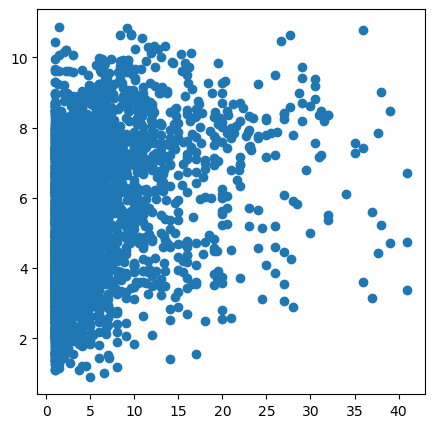

In [41]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)

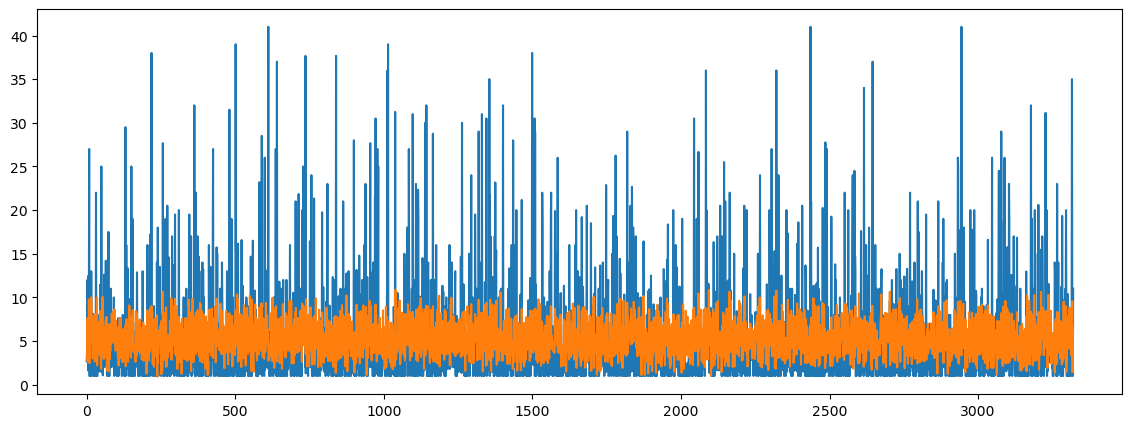

In [42]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)

In [43]:
filtered_data4 = data[data['PdlCyclist'] == 1]


# Pedal cyclist Regrasion

In [44]:
filtered_data4 = data[data['PdlCyclist'] == 1]
filtered_data4.info()
import xgboost as xgb


X = filtered_data4[['Age07','Age816','Age1725','Age2639','Age4064','Age6574',
                   'Male',
                   'MajorCities',
                    
                   
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                    
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',
                    
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                     
                   'CovidPrd' ]]

y = filtered_data4['BeddystoCC']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12354 entries, 32 to 54035
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12354 non-null  int64  
 1   BedDys           12354 non-null  int64  
 2   BeddystoCC       12354 non-null  float64
 3   Severity         12354 non-null  int64  
 4   DiedCases        12354 non-null  int64  
 5   DiedBdDys        12354 non-null  int64  
 6   Hsptlsns         12354 non-null  int64  
 7   April            12354 non-null  int64  
 8   August           12354 non-null  int64  
 9   December         12354 non-null  int64  
 10  February         12354 non-null  int64  
 11  January          12354 non-null  int64  
 12  July             12354 non-null  int64  
 13  June             12354 non-null  int64  
 14  March            12354 non-null  int64  
 15  May              12354 non-null  int64  
 16  November         12354 non-null  int64  
 17  October    

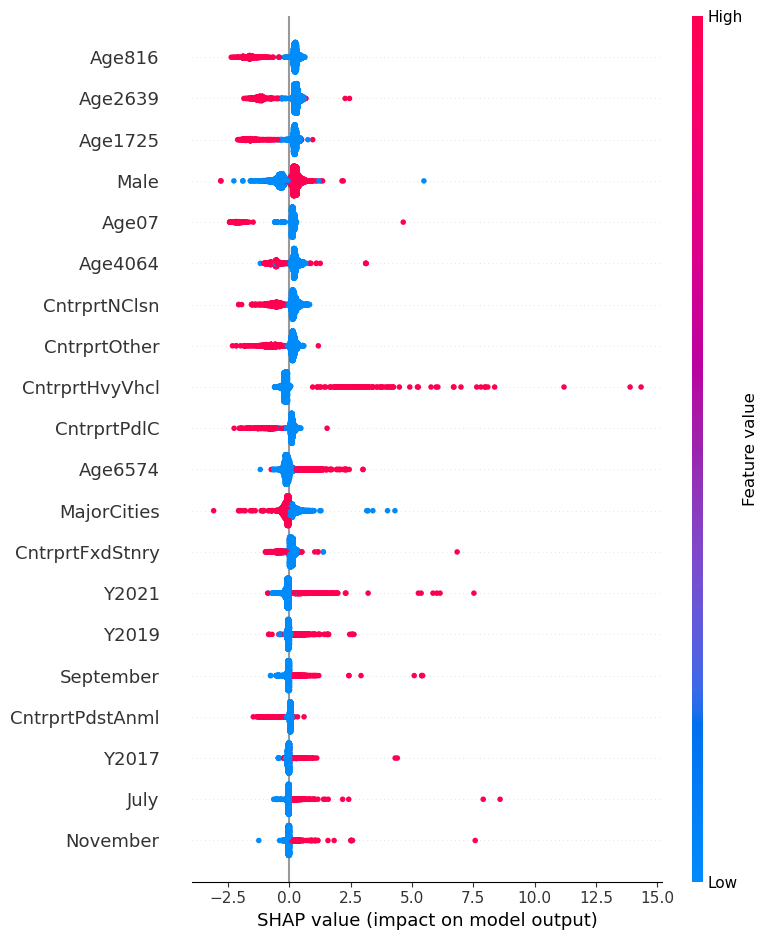

In [45]:
import shap


xgb_model.fit(x_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# نمایش SHAP values
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

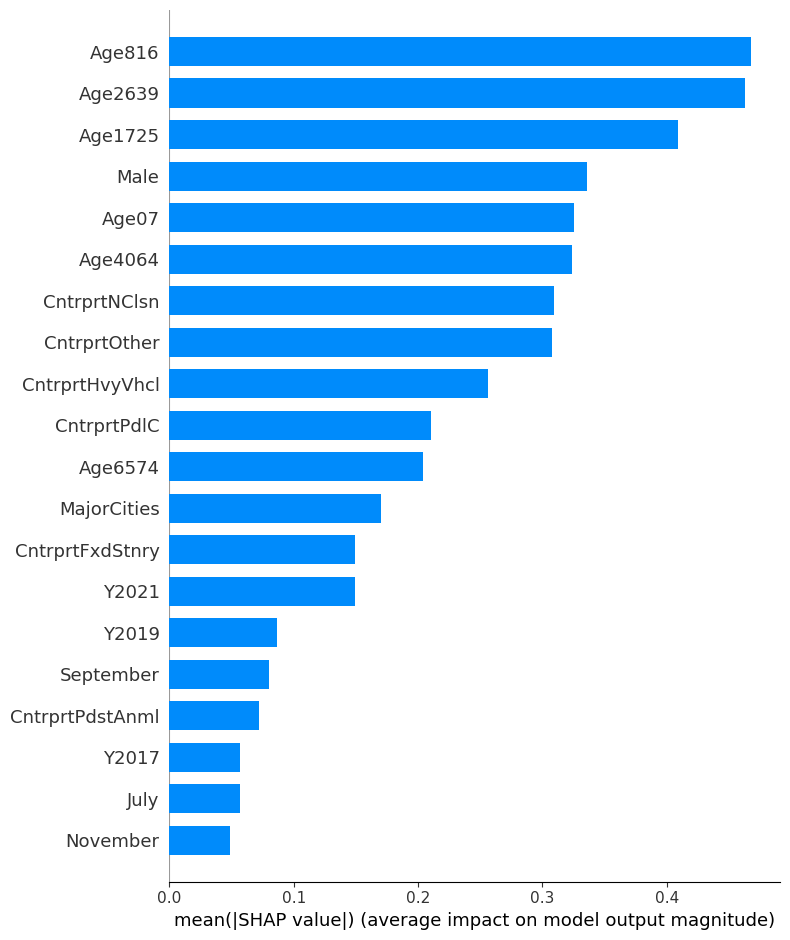

In [46]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type="bar")

         Feature  Mean SHAP Value
Age816    Age816         0.467573
Age2639  Age2639         0.463153
Age1725  Age1725         0.408806
Male        Male         0.335598
Age07      Age07         0.325421
Age4064  Age4064         0.323435


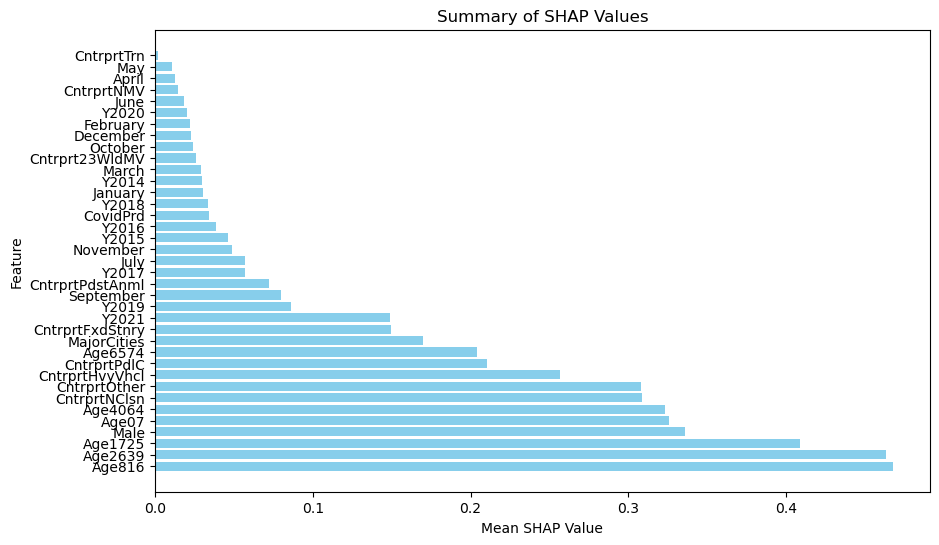

In [47]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:6])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [49]:
import plotly.graph_objects as go

source = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
value = [0.467573, 0.463153, 0.408806, 0.335598, 0.325421, 0.323435]
color = ["blue", "green", "red", "orange", "purple", "cyan", "pink", "brown", "olive", "teal", "navy"]
labels = ["Source", "Age816", "Age2639", "Age1725", "Male", "Age07", "Age4064"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()

In [50]:
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 6.11
MAE: 2.63
R^2: 0.05


## delete out liers

In [51]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)


xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)
# آموزش مدل
xgb_model.fit(x_train, y_train)

# پیش‌بینی برای داده‌های آزمون
pred = ridge_regressor.predict(x_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Age07
- Age6574
- Age816
- CntrprtOther
- CovidPrd
- ...
Feature names seen at fit time, yet now missing:
- CntrprtCrTrkVn
- Regional




ValueError: X has 37 features, but Ridge is expecting 33 features as input.

In [ ]:
pred.shape

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)

In [52]:
filtered_data5 = data[data['Pedestrian'] == 1]


# Pedestrian REGRESION

In [53]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()
X = filtered_data5[['Age816','Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Female',
                    
                   'MajorCities',
                    
                   'April','December','February','January','July',
                   'June','March','May','November','October','September',
                    
                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                    'CntrprtCrTrkVn',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV',
                   'CntrprtPdlC','CntrprtTrn','CntrprtNA',
                    
                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021']]

y = filtered_data5['BeddystoCC']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



xgb_model = xgb.XGBRegressor(
    n_estimators=20,
    
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October      

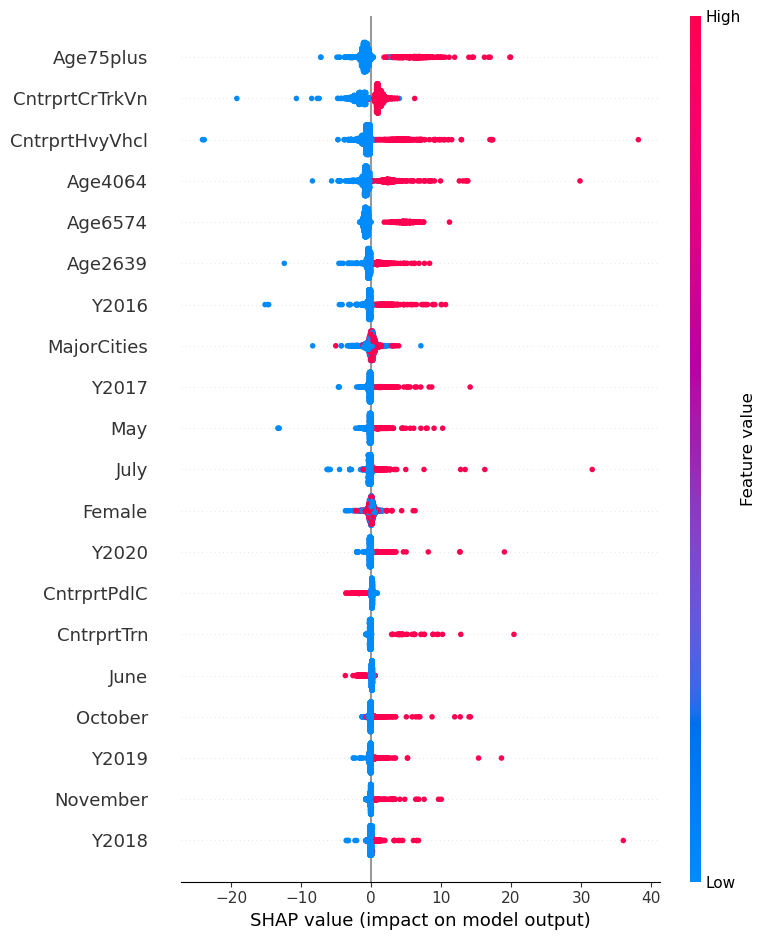

In [54]:
import shap


xgb_model.fit(x_train, y_train)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# نمایش SHAP values
shap.summary_plot(shap_values, x_test, feature_names=X.columns)

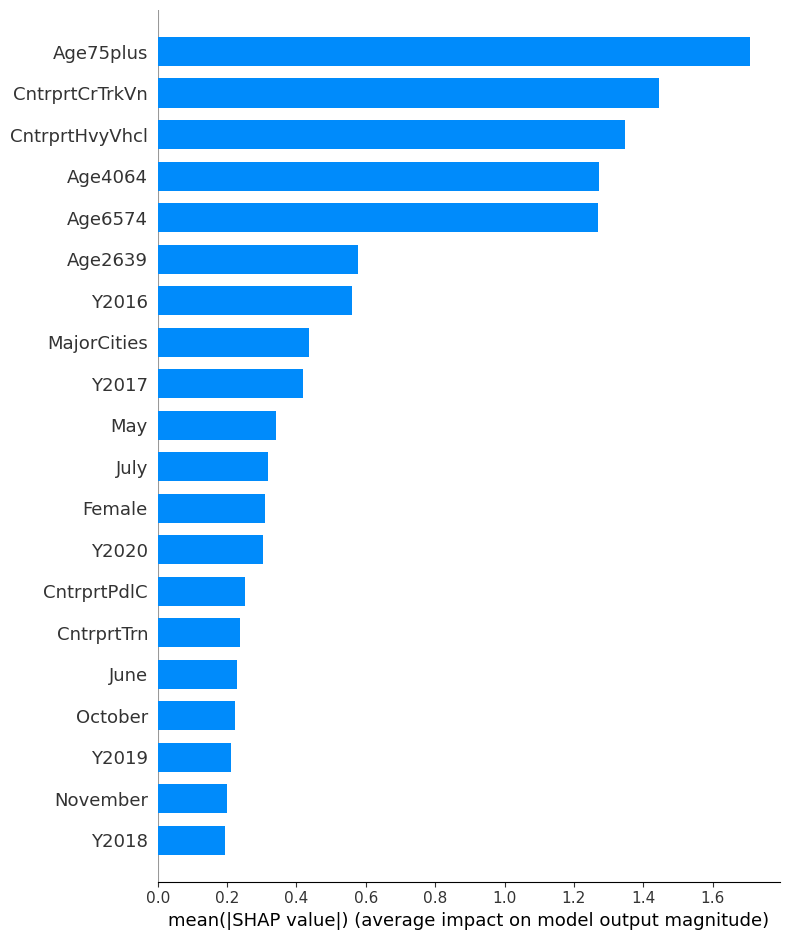

In [55]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# نمایش تأثیر فیچرها
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [56]:
xgb_model.fit(x_train, y_train)
pred = xgb_model.predict(x_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(y_test, pred)
print(f"MAE: {mae:.2f}")

r2 = r2_score(y_test, pred)
print(f"R^2: {r2:.2f}")

RMSE: 15.81
MAE: 7.68
R^2: -0.06


                       Feature  Mean SHAP Value
Age75plus            Age75plus         1.708467
CntrprtCrTrkVn  CntrprtCrTrkVn         1.446207
CntrprtHvyVhcl  CntrprtHvyVhcl         1.345716
Age4064                Age4064         1.273317
Age6574                Age6574         1.267938
Age2639                Age2639         0.577868


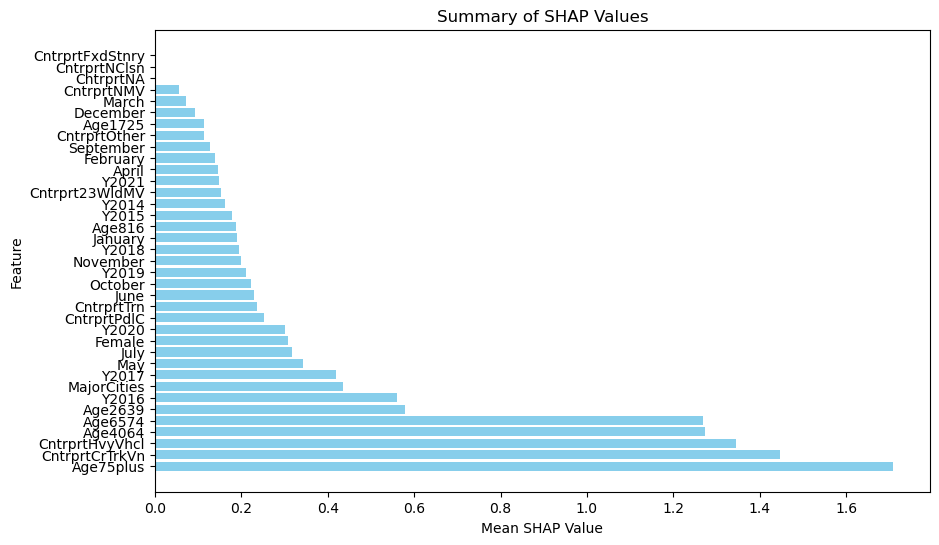

In [58]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:6])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


In [59]:
import plotly.graph_objects as go

source = [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
value = [1.708467, 1.446207, 1.345716, 1.273317, 1.267938, 0.577868, 0.773088, 0.590495, 0.486749, 0.479177, 0.473376, 0.438352, 1.112099, 0.666456, 0.626472, 0.508887, 0.468906, 0.331329, 0.467573, 0.463153, 0.408806, 0.335598, 0.325421, 0.323435]
color = ["blue", "green", "red", "orange", "purple", "cyan", "pink", "brown", "olive", "teal", "navy", "maroon", "gray", "lime", "gold", "crimson", "indigo", "violet", "magenta", "yellow", "turquoise", "silver", "tomato", "tan"]
labels = ["Source", "Age75plus", "CntrprtCrTrkVn", "CntrprtHvyVhcl", "Age4064", "Age6574", "Age2639", "CntrprtFxdStnry", "Age816", "Regional", "Age07", "Age1725", "Age2639", "CntrprtCrTrkVn", "CntrprtFxdStnry", "Male", "CntrprtHvyVhcl", "Age1725", "Age4064", "Age816", "Age2639", "Age1725", "Male", "Age07", "Age4064"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()

In [60]:
import plotly.graph_objects as go

source = [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
target = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
value = [1.708467, 1.446207, 1.345716, 1.273317, 1.267938, 0.577868, 0.773088, 0.590495, 0.486749, 0.479177, 0.473376, 0.438352, 1.112099, 0.666456, 0.626472, 0.508887, 0.468906, 0.331329, 0.467573, 0.463153, 0.408806, 0.335598, 0.325421, 0.323435]
color = ["blue", "green", "red", "orange", "purple", "cyan", "pink", "brown", "olive", "teal", "navy", "maroon", "gray", "lime", "gold", "crimson", "indigo", "violet", "magenta", "yellow", "turquoise", "silver", "tomato", "tan", "plum", "wheat"]
labels = ["Source", "Car Driver", "Car Passenger", "Motorcyclist", "Pedal Cyclist", "Pedestrian", "CntrprtFxdStnry", "Age816", "Regional", "Age07", "Age1725", "Age2639", "CntrprtCrTrkVn", "CntrprtFxdStnry", "Male", "CntrprtHvyVhcl", "Age1725", "Age4064", "Age816", "Age2639", "Age1725", "Male", "Age07", "Age4064"]

fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow for Road Users", font_size=10)
fig.show()

In [67]:
import plotly.graph_objects as go

# لیست از فیجرها و road users
road_users = [' Car Driver ', 'Road User 2', 'Road User 3', 'Road User 4', 'Road User 5']
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 
            'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10']

# مقادیر SHAP برای هر فیجر به ازای هر road user (این داده‌ها باید از تحلیل شما به دست آمده باشند)
shap_values = [
    # Road User 1's SHAP values for each feature
    [0.10, 0.20, 0.15, 0.05, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
    # Road User 2's SHAP values for each feature
    [0.08, 0.15, 0.12, 0.03, 0.02, 0.04, 0.06, 0.07, 0.01, 0.05],
    # ... اضافه کردن مقادیر برای سایر road users
    # Road User 5's SHAP values for each feature
    [0.07, 0.11, 0.09, 0.04, 0.03, 0.05, 0.02, 0.01, 0.06, 0.08],
    [0.07, 0.11, 0.09, 0.04, 0.03, 0.05, 0.02, 0.01, 0.06, 0.08],
    [0.07, 0.11, 0.09, 0.04, 0.03, 0.05, 0.02, 0.01, 0.06, 0.08]


]

# تعریف سورس، تارگت، ولیو و لیبل برای نمودار سانکی
source = []
target = []
value = []
label = road_users + features

# پر کردن لیست‌های سورس، تارگت و ولیو
for i, user_shap_values in enumerate(shap_values):
    for j, shap_value in enumerate(user_shap_values):
        source.append(i)
        target.append(len(road_users) + j)
        value.append(shap_value)

# ایجاد نمودار سانکی
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=label
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(title_text='Sankey Diagram for Road Users and Feature SHAP Values', font_size=10)
fig.show()

In [61]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_sankey(shap_values, node_name='Others', num_links=5, top_n=None, top_features=None, titles=None):
    # Create a dictionary for nodes
    nodes = {i: {"name": f"{k}"} for i, k in enumerate(shap_values.index)}
    nodes[len(shap_values.index)] = {"name": node_name}

    # Create a dictionary for links
    links = []
    for i, row in shap_values.iteritems():
        links.append({
            "source": 0,  # hunter
            "target": 1 if row > 0 else len(shap_values.index),  # winner
            "value": abs(row)
        })

    # Add links to connect the nodes
    if top_n and top_features:
        top_indices = shap_values[top_features].abs().nlargest(top_n).index.tolist()
        links = [l for l in links if l['source'] in top_indices or l['target'] in top_indices]

    # Limit the number of links
    links = links[:num_links]

    # Create Sankey diagram
    fig = go.Figure(go.Sankey(
        node = list(nodes.values()),
        link = links))

    # Set title
    if titles:
        fig.update_layout(title_text=titles[0])

    return fig

# Define the top features
top_n = 3
top_features = ['ge75plus', 'CntrprtCrTrkVn', 'CntrprtHvyVhcl']

# Load SHAP values
shap_values1 = pd.Series([1.708467, 1.446207, 1.345716, 0, 0, 0],
                        index=['ge75plus', 'CntrprtCrTrkVn', 'CntrprtHvyVhcl', 'Age4064', 'Age6574', 'Age2639'])
shap_values2 = pd.Series([1.273317, 1.267938, 0.577868, 0, 0, 0],
                        index=['Age4064', 'Age6574', 'Age2639', 'ge75plus', 'CntrprtCrTrkVn', 'CntrprtHvyVhcl'])
shap_values3 = pd.Series([0.467573, 0.463153, 0.408806, 0.335598, 0.325421, 0.323435],
                        index=['Age816', 'Age2639', 'Age1725', 'Male', 'Age07', 'Age4064'])
shap_values4 = pd.Series([1.112099, 0.666456, 0.508887, 0.432113, 0

SyntaxError: unexpected EOF while parsing (2794468089.py, line 49)

## delete out liers

In [ ]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3)

ridge_regressor = Ridge(alpha=1.0)  # مقدار پیش‌فرض برای پارامتر جمله جریمه (alpha) را می‌توانید تغییر دهید

# آموزش مدل
ridge_regressor.fit(x_train, y_train)

# پیش‌بینی برای داده‌های آزمون
pred = ridge_regressor.predict(x_test)
rmse = mean_squared_error(y_test, pred, squared=False)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

In [ ]:
pred.shape

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, pred)

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))

_ = ax.plot(range(len(y_test)), y_test)

_ = ax.plot(range(len(y_test)), pred)

In [74]:
import plotly.graph_objects as go

# داده های شما برای پنج دسته SHAP
source = [0, 0, 0, 0, 0]  # منبع جریان
target = [1, 2, 3, 4, 5]  # مقصد جریان
value = [10, 20, 30, 40, 50]  # مقدار جریان برای هر دسته

# رنگ ها برای هر دسته (می توانید آنها را تغییر دهید)
color = ["blue", "green", "red", "orange", "purple"]

# لیبل ها برای منبع و مقصد جریان
labels = ["Source"] + [f"Class {i}" for i in range(1, 6)]

# ایجاد نمودار Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
      color="blue"
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=color
))])

fig.update_layout(title_text="SHAP Value Flow", font_size=10)
fig.show()